<a href="https://colab.research.google.com/github/romilenecruz/Public_Reputation_ML/blob/main/facebook_prophet_try_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings;
warnings.simplefilter('ignore')

## **Intalling and importing dependencies**

In [ ]:
!pip install pystan
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

## **Reading in the data**

In [ ]:
df = pd.read_excel('/content/manually_added_all_data_6.xlsx')

df

,Song Name,22/10/18,22/10/19,22/10/21,22/10/22,22/10/23,22/10/24,22/10/25,22/10/27,22/10/28,22/10/29,22/10/30,22/10/31,22/11/01,22/11/02,22/11/03,22/11/04,22/11/05,22/11/06,22/11/07,22/11/08,22/11/09,22/11/10,22/11/11,22/11/12,22/11/13,22/11/14,22/11/15,22/11/16,22/11/17,22/11/18,22/11/19,22/11/20,22/11/21,22/11/22,22/11/23,22/11/24,22/11/25,22/11/26,22/11/27,...,23/04/20,23/04/21,23/04/22,23/04/23,23/04/24,23/04/26,23/04/27,23/04/28,23/04/29,23/04/30,23/05/01,23/05/02,23/05/03,23/05/05,23/05/07,23/05/08,23/05/09,23/05/10,23/05/11,23/05/12,23/05/13,23/05/14,23/05/16,23/05/17,23/05/18,23/05/20,23/05/21,23/05/22,23/05/24,23/05/25,23/05/27,23/05/28,23/05/29,23/05/31,23/06/01,23/06/02,23/06/03,23/06/04,23/06/05,23/06/06
0,... Ready For It?,210096,215021,226159,187254,171185,182558,190197,196628,200262,183441,168569,181223,190964,214610,220917,227578,215197,199185,217518,214883,214099,226728,223391,207227,190184,211138,246194,249698,242858,241273,223724,206201,223526,233704,233910,208757,200850,198816,193119,...,478793,487188,457154,424696,466265,474670,476118,485129,455482,423189,457120,461520,471036,491368,446468,489654,511529,519437,520735,534221,498702,446468,507121,507650,503730,481163,460648,495471,493026,497508,455694,419345,440313,473176,479476,542118,533156,483883,540824,563838
1,End Game,186596,192287,178786,141193,128834,137293,143609,146093,144720,131179,119939,129194,140169,157834,165998,171671,159331,146794,161070,162178,159295,170523,167233,149892,139171,155603,175712,181208,177435,177469,164464,149601,162299,168152,168063,151530,145791,142914,140328,...,279434,284572,269838,254886,284000,288694,288908,289958,271621,255334,279550,282624,286329,289865,266418,294002,306323,314140,315389,317618,292041,266418,306696,306298,305431,286877,271937,295451,297000,303649,271493,254372,274987,295058,297189,315405,300730,277879,310311,320364
2,I Did Something Bad,224790,225876,221727,197294,186144,190960,200785,223538,243458,267242,246040,345857,248679,221636,224847,229649,212891,199368,218299,218730,215042,224688,222598,206007,190916,214160,236222,243359,240469,240409,219046,198116,216789,227684,226385,200974,196229,192824,192023,...,345973,368311,337549,314982,353313,363914,364301,355059,329168,309237,339230,346477,346799,355147,318867,355964,369262,376324,377370,379059,345480,318867,362725,363479,359882,334711,316073,348270,352729,357786,315362,292119,320940,350518,350041,364576,346066,324620,366557,374840
3,Dont Blame Me,1130398,1137836,1396092,1237255,1170633,1240849,1306857,1346538,1234671,1075976,992635,1049732,1077618,1152532,1087371,1057680,991200,941674,1000316,1003698,995393,1007139,999318,927989,876280,946832,989578,1011479,1008491,998150,917978,848106,896779,923397,931590,865201,847308,836471,818996,...,1354147,1359202,1294997,1228434,1302463,1332534,1339425,1377372,1313001,1233594,1326255,1342972,1357125,1338377,1242417,1335183,1372474,1420606,1450826,1478784,1397736,1242417,1408035,1411026,1398486,1380557,1329263,1398977,1433123,1454935,1339773,1241703,1302951,1357455,1341230,1448024,1409533,1308719,1418220,1462570
4,Delicate,360113,369679,350439,290880,277814,297228,312795,311742,306963,275061,253231,275822,300678,347101,359795,365936,332720,311086,336788,334982,331698,341930,342410,314461,295326,327497,359996,377404,371654,369581,340173,310594,334959,347756,347653,313113,299927,294201,286312,...,603931,600681,70094,538623,594247,613695,617714,633682,592549,550565,595854,606833,612133,627279,278088,639905,667694,690635,704152,714263,664429,578088,659715,676692,673895,641688,608598,647878,648119,652516,599795,559856,592525,622135,635554,707889,698613,637607,702233,728450
5,Look WhatYou Made Me Do,368975,377487,372604,334660,307433,315610,323817,332662,337802,323202,297272,319319,314299,334334,349473,361500,345987,321403,339859,341131,340352,352695,357821,341030,315519,335130,357692,368143,364238,364968,345867,316277,331656,342977,347051,323382,319757,315737,307034,...,537742,551087,528763,497359,535868,553864,54861

## **Converting the column headers into DateTime format and renaming the column to 'ds'**

In [ ]:
column_headers = list(df.columns.values)

transpose_columns = pd.DataFrame(column_headers)

new_df = transpose_columns.drop([0])

new_df.reset_index(inplace=True, drop=True)

new_df[0] = pd.to_datetime(new_df[0], format="%y/%m/%d")

new_df

,0
0,2022-10-18
1,2022-10-19
2,2022-10-21
3,2022-10-22
4,2022-10-23
...,...
209,2023-06-02
210,2023-06-03
211,2023-06-04
212,2023-06-05


In [ ]:
best_df = new_df

best_df.columns = ['ds']

best_df

,ds
0,2022-10-18
1,2022-10-19
2,2022-10-21
3,2022-10-22
4,2022-10-23
...,...
209,2023-06-02
210,2023-06-03
211,2023-06-04
212,2023-06-05


## **Transposing the original data frame and taking the first song name, renaming the column name to 'y', dropping the 'Song Name' column**

In [ ]:
transposed = df.transpose()

transposed

In [ ]:
ready_for_it = transposed.loc[:,0]

ready_for_it_df = pd.DataFrame(ready_for_it)

ready_for_it_df

,0
Song Name,... Ready For It?
22/10/18,210096
22/10/19,215021
22/10/21,226159
22/10/22,187254
...,...
23/06/02,542118
23/06/03,533156
23/06/04,483883
23/06/05,540824


In [ ]:
dropped = ready_for_it_df.drop(['Song Name'])

dropped.reset_index(inplace=True, drop=True)

dropped.columns = ['y']

dropped

,y
0,210096
1,215021
2,226159
3,187254
4,171185
...,...
209,542118
210,533156
211,483883
212,540824


In [ ]:
best_df

,ds
0,2022-10-18
1,2022-10-19
2,2022-10-21
3,2022-10-22
4,2022-10-23
...,...
209,2023-06-02
210,2023-06-03
211,2023-06-04
212,2023-06-05


## **Concatenating the two dataframes together**

In [ ]:
final_df = pd.concat([dropped, best_df], axis=1, join='inner')

final_df

In [ ]:
final_df.dtypes

In [ ]:
final_df.head()

## **Time-Series Forecasting w/ Prophet (((:**

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(final_df)

In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

In [ ]:
forecast.tail()

In [ ]:
forecast.to_excel("/content/forecast_ready_for_it.xlsx")

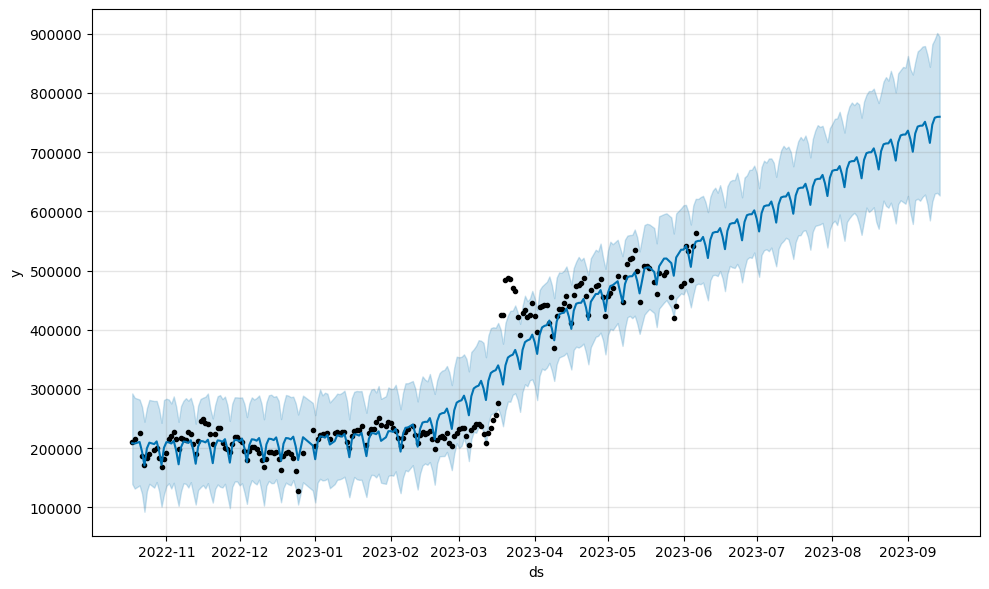

In [ ]:
plot1 = m.plot(forecast)

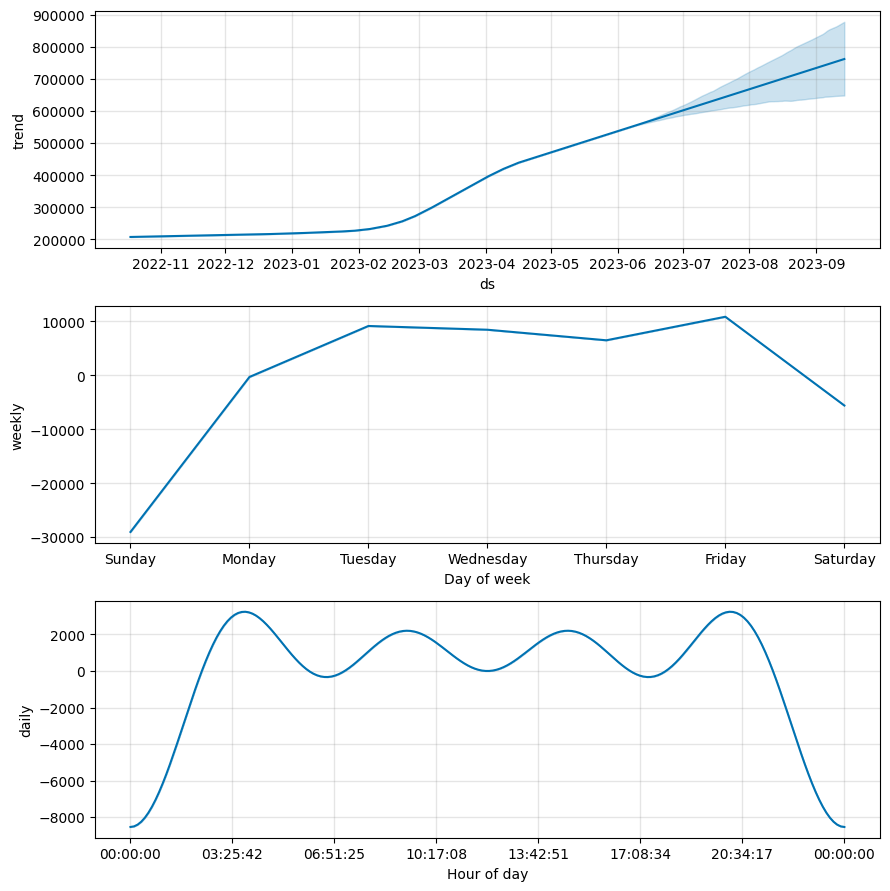

In [ ]:
plt2 = m.plot_components(forecast)